<a href="https://colab.research.google.com/github/KirvelPasha/data-science/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np
import matplotlib.pyplot as plt

In [74]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [75]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

In [107]:
data

array([[-1.13431848e+00, -7.07420888e-01],
       [-2.76179492e-01, -5.16883894e-01],
       [-4.62005348e-01,  3.50888494e-01],
       [ 3.65053516e-01,  7.74082033e-01],
       [-1.02141473e+00,  4.32395701e-01],
       [-3.13508197e-01,  7.71011738e-01],
       [-4.54227855e-01,  5.14370717e-01],
       [-4.16757847e-01, -5.62668272e-02],
       [-1.25542722e+00,  9.38163671e-01],
       [ 1.00036589e+00, -3.81092518e-01],
       [-1.73795950e+00,  1.04082395e+00],
       [-1.54667461e+00, -2.08265194e+00],
       [ 2.04207979e-01,  1.40669624e+00],
       [-2.13619610e+00,  1.64027081e+00],
       [ 4.33496330e-01,  1.27837923e+00],
       [-4.68346260e-01, -1.25472031e+00],
       [-2.69056960e-01,  2.23136679e+00],
       [-3.25049628e-01, -5.60234506e-01],
       [-9.02246068e-01, -5.90972275e-01],
       [-1.41881055e+00, -2.51774118e-01],
       [ 6.95119605e-01, -2.03346655e+00],
       [-1.09873895e+00,  1.58448706e+00],
       [-6.53250268e-01,  8.42456282e-01],
       [ 3.

In [104]:
data.shape

(100, 2)

In [105]:
data_new = data.reshape((-1, 2))

In [108]:
data_new

array([[-1.13431848e+00, -7.07420888e-01],
       [-2.76179492e-01, -5.16883894e-01],
       [-4.62005348e-01,  3.50888494e-01],
       [ 3.65053516e-01,  7.74082033e-01],
       [-1.02141473e+00,  4.32395701e-01],
       [-3.13508197e-01,  7.71011738e-01],
       [-4.54227855e-01,  5.14370717e-01],
       [-4.16757847e-01, -5.62668272e-02],
       [-1.25542722e+00,  9.38163671e-01],
       [ 1.00036589e+00, -3.81092518e-01],
       [-1.73795950e+00,  1.04082395e+00],
       [-1.54667461e+00, -2.08265194e+00],
       [ 2.04207979e-01,  1.40669624e+00],
       [-2.13619610e+00,  1.64027081e+00],
       [ 4.33496330e-01,  1.27837923e+00],
       [-4.68346260e-01, -1.25472031e+00],
       [-2.69056960e-01,  2.23136679e+00],
       [-3.25049628e-01, -5.60234506e-01],
       [-9.02246068e-01, -5.90972275e-01],
       [-1.41881055e+00, -2.51774118e-01],
       [ 6.95119605e-01, -2.03346655e+00],
       [-1.09873895e+00,  1.58448706e+00],
       [-6.53250268e-01,  8.42456282e-01],
       [ 3.

In [106]:
data_new.shape

(100, 2)

In [76]:
target

array([ -45.38589148,  -10.29545833,  -21.47606913,   11.96165156,
        -42.44469577,  -16.30914909,  -22.64686884,  -13.26392817,
        -45.27502383,   39.70663436,  -70.11132234,  -63.4056294 ,
         14.76930132,  -84.32102748,   21.20540389,  -18.86438755,
        -15.01435792,  -11.18242389,  -37.31870104,  -57.46293828,
         11.06961035,  -35.32062686,  -18.57607726,  126.64909941,
         19.66406455,    0.34799656,  -36.44717565,  -16.79027112,
        -40.84204295,  101.14760598,   58.26281761,    5.86887774,
         45.05465366,   64.19559505,  -12.0017312 ,  -71.3715844 ,
         49.41686419,  -52.37232463,  -16.65927231,   27.83791274,
        -26.87743177,  -16.85466265,   -1.42235396,   28.15553021,
         41.95683853,    4.45578287,  -80.80239408,  -61.47026695,
         22.2276832 ,   25.24428409,   11.74073026,  -21.48288019,
         12.47089016,  -44.51417742,  -91.477377  ,    1.72644759,
         64.70214251,   24.47584129,  -32.92158843,  -12.98848

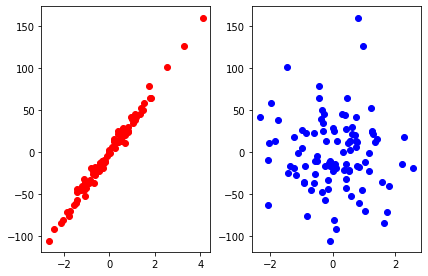

In [77]:
fig, axes=plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
axes[0].scatter(data[:,0], target, color = 'r')
axes[1].scatter(data[:,1], target, color = 'b');

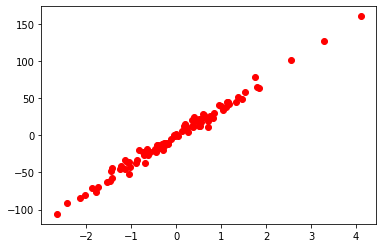

In [78]:
plt.scatter(data[:,0], target, color = 'r');

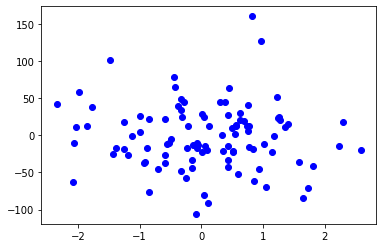

In [79]:
plt.scatter(data[:,1], target, color = 'b');

In [80]:
target.shape

(100,)

In [81]:
target

array([ -45.38589148,  -10.29545833,  -21.47606913,   11.96165156,
        -42.44469577,  -16.30914909,  -22.64686884,  -13.26392817,
        -45.27502383,   39.70663436,  -70.11132234,  -63.4056294 ,
         14.76930132,  -84.32102748,   21.20540389,  -18.86438755,
        -15.01435792,  -11.18242389,  -37.31870104,  -57.46293828,
         11.06961035,  -35.32062686,  -18.57607726,  126.64909941,
         19.66406455,    0.34799656,  -36.44717565,  -16.79027112,
        -40.84204295,  101.14760598,   58.26281761,    5.86887774,
         45.05465366,   64.19559505,  -12.0017312 ,  -71.3715844 ,
         49.41686419,  -52.37232463,  -16.65927231,   27.83791274,
        -26.87743177,  -16.85466265,   -1.42235396,   28.15553021,
         41.95683853,    4.45578287,  -80.80239408,  -61.47026695,
         22.2276832 ,   25.24428409,   11.74073026,  -21.48288019,
         12.47089016,  -44.51417742,  -91.477377  ,    1.72644759,
         64.70214251,   24.47584129,  -32.92158843,  -12.98848

In [82]:
target_new = target.reshape((-1, 1))
target_new

array([[ -45.38589148],
       [ -10.29545833],
       [ -21.47606913],
       [  11.96165156],
       [ -42.44469577],
       [ -16.30914909],
       [ -22.64686884],
       [ -13.26392817],
       [ -45.27502383],
       [  39.70663436],
       [ -70.11132234],
       [ -63.4056294 ],
       [  14.76930132],
       [ -84.32102748],
       [  21.20540389],
       [ -18.86438755],
       [ -15.01435792],
       [ -11.18242389],
       [ -37.31870104],
       [ -57.46293828],
       [  11.06961035],
       [ -35.32062686],
       [ -18.57607726],
       [ 126.64909941],
       [  19.66406455],
       [   0.34799656],
       [ -36.44717565],
       [ -16.79027112],
       [ -40.84204295],
       [ 101.14760598],
       [  58.26281761],
       [   5.86887774],
       [  45.05465366],
       [  64.19559505],
       [ -12.0017312 ],
       [ -71.3715844 ],
       [  49.41686419],
       [ -52.37232463],
       [ -16.65927231],
       [  27.83791274],
       [ -26.87743177],
       [ -16.854

In [103]:
target_new.shape

(100, 1)

In [83]:
target = target.reshape((100, 1))

In [84]:
target

array([[ -45.38589148],
       [ -10.29545833],
       [ -21.47606913],
       [  11.96165156],
       [ -42.44469577],
       [ -16.30914909],
       [ -22.64686884],
       [ -13.26392817],
       [ -45.27502383],
       [  39.70663436],
       [ -70.11132234],
       [ -63.4056294 ],
       [  14.76930132],
       [ -84.32102748],
       [  21.20540389],
       [ -18.86438755],
       [ -15.01435792],
       [ -11.18242389],
       [ -37.31870104],
       [ -57.46293828],
       [  11.06961035],
       [ -35.32062686],
       [ -18.57607726],
       [ 126.64909941],
       [  19.66406455],
       [   0.34799656],
       [ -36.44717565],
       [ -16.79027112],
       [ -40.84204295],
       [ 101.14760598],
       [  58.26281761],
       [   5.86887774],
       [  45.05465366],
       [  64.19559505],
       [ -12.0017312 ],
       [ -71.3715844 ],
       [  49.41686419],
       [ -52.37232463],
       [ -16.65927231],
       [  27.83791274],
       [ -26.87743177],
       [ -16.854

In [85]:
data[:, 0].shape

(100,)

In [86]:
data_new = data[:, 0].reshape((100, 1))

In [87]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data_new, target,  
                                                                                    test_size = 0.3)

**LinearRegression**

In [88]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [89]:
print(test_labels)

[[  -1.42235396]
 [  34.35183007]
 [  11.74073026]
 [ -22.32195021]
 [  24.47584129]
 [ -80.80239408]
 [ -22.33224966]
 [  44.41658249]
 [ -36.69728864]
 [  39.70663436]
 [  22.13032804]
 [  25.24428409]
 [  12.67156468]
 [ -18.57607726]
 [ -21.48288019]
 [  58.26281761]
 [ -42.44469577]
 [-105.77758163]
 [  12.42286854]
 [ -84.32102748]
 [  44.66274342]
 [ -45.27502383]
 [ -16.30914909]
 [ -11.18242389]
 [  -4.38652971]
 [   4.45578287]
 [ -76.75213382]
 [ -63.4056294 ]
 [  41.95683853]
 [  14.76930132]]


In [90]:
print(predictions)

[[  -1.18929629]
 [  38.70998041]
 [  13.58390218]
 [ -22.97983657]
 [  22.71900507]
 [ -77.83558056]
 [ -28.82409429]
 [  43.58258243]
 [ -26.95529388]
 [  37.47134962]
 [  19.977959  ]
 [  14.57272412]
 [  13.96415567]
 [ -25.2359534 ]
 [ -24.53171803]
 [  57.62252645]
 [ -39.19723484]
 [-101.31366956]
 [   6.37753488]
 [ -81.4712128 ]
 [  50.18258589]
 [ -48.07129666]
 [ -12.3524865 ]
 [ -12.79015279]
 [  -4.80284898]
 [   9.26564688]
 [ -68.4732827 ]
 [ -59.11578149]
 [  44.03801775]
 [   7.27999292]]


In [91]:
metrics.mean_squared_error(test_labels, predictions)

21.803101302000258

In [92]:
metrics.mean_absolute_error(test_labels, predictions)

3.7812321143662926

In [93]:
metrics.r2_score(test_labels, predictions)

0.9879223004708435

In [94]:
coef

array([38.07925837,  0.        ])

In [95]:
linear_regressor.coef_

array([[37.92131738]])

In [96]:
linear_regressor.intercept_

array([-0.46384266])

**Cross Val Score**

In [97]:
linear_regressor_score = linear_model.LinearRegression()

In [98]:
linear_scoring = model_selection.cross_val_score(linear_regressor_score, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)

In [99]:
print('mean:', linear_scoring.mean())

mean: -4.070071498779696


In [100]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [101]:
linear_scoring = model_selection.cross_val_score(linear_regressor_score, data, target, scoring = scorer, 
                                                  cv = 10)

In [102]:
print('mean:', linear_scoring.mean())

mean: 4.070071498779696
